In [14]:
import k2

In [15]:
token_ids=[[1, 2]]
s = k2.SymbolTable.from_str('''
A 1
B 2
''')

In [16]:
decoding_graph = k2.ctc_graph(token_ids, modified=False)
decoding_graph.labels_sym = s
print(k2.to_dot(decoding_graph[0]))

digraph WFST {
	graph [center=1 nodesep=0.25 orientation=Portrait rankdir=LR ranksep=0.4 size="8.5,11"]
	0 [label=0 fontsize=14 shape=circle style=bold]
	0 -> 0 [label="ε:0/0"]
	1 [label=1 fontsize=14 shape=circle style=bold]
	0 -> 1 [label="A:1/0"]
	2 [label=2 fontsize=14 shape=circle style=bold]
	1 -> 2 [label="ε:0/0"]
	1 -> 1 [label="A:0/0"]
	3 [label=3 fontsize=14 shape=circle style=bold]
	1 -> 3 [label="B:2/0"]
	2 -> 2 [label="ε:0/0"]
	2 -> 3 [label="B:2/0"]
	4 [label=4 fontsize=14 shape=circle style=bold]
	3 -> 4 [label="ε:0/0"]
	3 -> 3 [label="B:0/0"]
	5 [label=5 fontsize=14 shape=doublecircle style=bold]
	3 -> 5 [label="-1:-1/0"]
	4 -> 4 [label="ε:0/0"]
	4 -> 5 [label="-1:-1/0"]
}



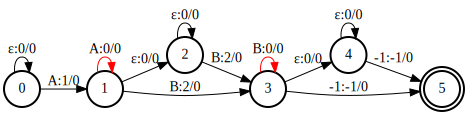

In [17]:
import graphviz
ss = """
digraph WFST {
    margin=0;
    graph [center=1 nodesep=0.2 orientation=Portrait rankdir=LR ranksep=0 size="8.5,11"]
        0 [label=0 fontsize=14 shape=circle style=bold]
        0 -> 0 [label="ε:0/0"]
        1 [label=1 fontsize=14 shape=circle style=bold]
        0 -> 1 [label="A:1/0"]
        2 [label=2 fontsize=14 shape=circle style=bold]
        1 -> 2 [label="ε:0/0"]
        1 -> 1 [label="A:0/0", color=red]
        3 [label=3 fontsize=14 shape=circle style=bold]
        1 -> 3 [label="B:2/0"]
        2 -> 2 [label="ε:0/0"]
        2 -> 3 [label="B:2/0"]
        4 [label=4 fontsize=14 shape=circle style=bold]
        3 -> 4 [label="ε:0/0"]
        3 -> 3 [label="B:0/0", color=red]
        5 [label=5 fontsize=14 shape=doublecircle style=bold]
        3 -> 5 [label="-1:-1/0"]
        4 -> 4 [label="ε:0/0"]
        4 -> 5 [label="-1:-1/0"]
}
"""
source = graphviz.Source(ss)
source.render('raw', format='pdf')
source

In [18]:
decoding_graph = k2.ctc_graph(token_ids, modified=False)
decoding_graph.labels_sym = s
all_self_blanks_idx = (decoding_graph.arcs.values()[:, 0] == decoding_graph.arcs.values()[:, 1])
blank_self_loops_idx = decoding_graph.arcs.values()[:, 2] == 0
decoding_graph.scores[all_self_blanks_idx] = -0.05
decoding_graph.scores[blank_self_loops_idx] = 0.0
print(k2.to_dot(decoding_graph[0]))

digraph WFST {
	graph [center=1 nodesep=0.25 orientation=Portrait rankdir=LR ranksep=0.4 size="8.5,11"]
	0 [label=0 fontsize=14 shape=circle style=bold]
	0 -> 0 [label="ε:0/0"]
	1 [label=1 fontsize=14 shape=circle style=bold]
	0 -> 1 [label="A:1/0"]
	2 [label=2 fontsize=14 shape=circle style=bold]
	1 -> 2 [label="ε:0/0"]
	1 -> 1 [label="A:0/-0.05"]
	3 [label=3 fontsize=14 shape=circle style=bold]
	1 -> 3 [label="B:2/0"]
	2 -> 2 [label="ε:0/0"]
	2 -> 3 [label="B:2/0"]
	4 [label=4 fontsize=14 shape=circle style=bold]
	3 -> 4 [label="ε:0/0"]
	3 -> 3 [label="B:0/-0.05"]
	5 [label=5 fontsize=14 shape=doublecircle style=bold]
	3 -> 5 [label="-1:-1/0"]
	4 -> 4 [label="ε:0/0"]
	4 -> 5 [label="-1:-1/0"]
}



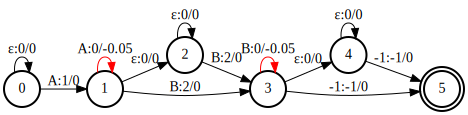

In [19]:
import graphviz
ss = """
digraph WFST {
    margin=0;
    graph [center=1 nodesep=0.2 orientation=Portrait rankdir=LR ranksep=0 size="8.5,11"]
        0 [label=0 fontsize=14 shape=circle style=bold]
        0 -> 0 [label="ε:0/0"]
        1 [label=1 fontsize=14 shape=circle style=bold]
        0 -> 1 [label="A:1/0"]
        2 [label=2 fontsize=14 shape=circle style=bold]
        1 -> 2 [label="ε:0/0"]
        1 -> 1 [label="A:0/-0.05", color=red]
        3 [label=3 fontsize=14 shape=circle style=bold]
        1 -> 3 [label="B:2/0"]
        2 -> 2 [label="ε:0/0"]
        2 -> 3 [label="B:2/0"]
        4 [label=4 fontsize=14 shape=circle style=bold]
        3 -> 4 [label="ε:0/0"]
        3 -> 3 [label="B:0/-0.05", color=red]
        5 [label=5 fontsize=14 shape=doublecircle style=bold]
        3 -> 5 [label="-1:-1/0"]
        4 -> 4 [label="ε:0/0"]
        4 -> 5 [label="-1:-1/0"]
}
"""
source = graphviz.Source(ss)
source.render('soft_0.05', format='pdf')
source

In [20]:
decoding_graph = k2.fast_ctc_graph(token_ids, modified=False, max_repeat=1)
decoding_graph.labels_sym = s
print(k2.to_dot(decoding_graph[0]))

digraph WFST {
	graph [center=1 nodesep=0.25 orientation=Portrait rankdir=LR ranksep=0.4 size="8.5,11"]
	0 [label=0 fontsize=14 shape=circle style=bold]
	0 -> 0 [label="ε:0/0"]
	1 [label=1 fontsize=14 shape=circle style=bold]
	0 -> 1 [label="A:1/0"]
	2 [label=2 fontsize=14 shape=circle style=bold]
	1 -> 2 [label="ε:0/0"]
	3 [label=3 fontsize=14 shape=circle style=bold]
	1 -> 3 [label="B:2/0"]
	2 -> 2 [label="ε:0/0"]
	2 -> 3 [label="B:2/0"]
	4 [label=4 fontsize=14 shape=circle style=bold]
	3 -> 4 [label="ε:0/0"]
	5 [label=5 fontsize=14 shape=doublecircle style=bold]
	3 -> 5 [label="-1:-1/0"]
	4 -> 4 [label="ε:0/0"]
	4 -> 5 [label="-1:-1/0"]
}



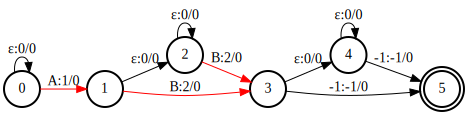

In [24]:
import graphviz
ss = """
digraph WFST {
    margin=0;
    graph [center=1 nodesep=0.2 orientation=Portrait rankdir=LR ranksep=0 size="8.5,11"]
        0 [label=0 fontsize=14 shape=circle style=bold]
        0 -> 0 [label="ε:0/0"]
        1 [label=1 fontsize=14 shape=circle style=bold]
        0 -> 1 [label="A:1/0", color=red]
        2 [label=2 fontsize=14 shape=circle style=bold]
        1 -> 2 [label="ε:0/0"]
        3 [label=3 fontsize=14 shape=circle style=bold]
        1 -> 3 [label="B:2/0", color=red]
        2 -> 2 [label="ε:0/0"]
        2 -> 3 [label="B:2/0", color=red]
        4 [label=4 fontsize=14 shape=circle style=bold]
        3 -> 4 [label="ε:0/0"]
        5 [label=5 fontsize=14 shape=doublecircle style=bold]
        3 -> 5 [label="-1:-1/0"]
        4 -> 4 [label="ε:0/0"]
        4 -> 5 [label="-1:-1/0"]
}
"""
source = graphviz.Source(ss)
source.render('hard_1', format='pdf')
source

In [22]:
decoding_graph = k2.fast_ctc_graph(token_ids, modified=False, max_repeat=1)
decoding_graph.labels_sym = s
print(k2.to_dot(decoding_graph[0]))

digraph WFST {
	graph [center=1 nodesep=0.25 orientation=Portrait rankdir=LR ranksep=0.4 size="8.5,11"]
	0 [label=0 fontsize=14 shape=circle style=bold]
	0 -> 0 [label="ε:0/0"]
	1 [label=1 fontsize=14 shape=circle style=bold]
	0 -> 1 [label="A:1/0"]
	2 [label=2 fontsize=14 shape=circle style=bold]
	1 -> 2 [label="ε:0/0"]
	3 [label=3 fontsize=14 shape=circle style=bold]
	1 -> 3 [label="B:2/0"]
	2 -> 2 [label="ε:0/0"]
	2 -> 3 [label="B:2/0"]
	4 [label=4 fontsize=14 shape=circle style=bold]
	3 -> 4 [label="ε:0/0"]
	5 [label=5 fontsize=14 shape=doublecircle style=bold]
	3 -> 5 [label="-1:-1/0"]
	4 -> 4 [label="ε:0/0"]
	4 -> 5 [label="-1:-1/0"]
}



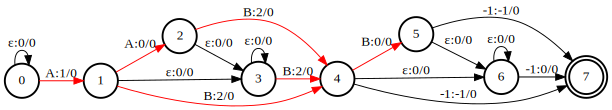

In [25]:
import graphviz
ss = """
digraph WFST {
    margin=0;
    graph [center=1 nodesep=0.2 orientation=Portrait rankdir=LR ranksep=0 size="8.5,11"]
        0 [label=0 fontsize=14 shape=circle style=bold]
        0 -> 0 [label="ε:0/0"]
        1 [label=1 fontsize=14 shape=circle style=bold]
        0 -> 1 [label="A:1/0", color=red]
        2 [label=2 fontsize=14 shape=circle style=bold]
        1 -> 2 [label="A:0/0", color=red]
        3 [label=3 fontsize=14 shape=circle style=bold]
        1 -> 3 [label="ε:0/0"]
        4 [label=4 fontsize=14 shape=circle style=bold]
        1 -> 4 [label="B:2/0", color=red]
        2 -> 3 [label="ε:0/0"]
        2 -> 4 [label="B:2/0", color=red]
        3 -> 3 [label="ε:0/0"]
        3 -> 4 [label="B:2/0", color=red]
        5 [label=5 fontsize=14 shape=circle style=bold]
        4 -> 5 [label="B:0/0", color=red]
        6 [label=6 fontsize=14 shape=circle style=bold]
        4 -> 6 [label="ε:0/0"]
        7 [label=7 fontsize=14 shape=doublecircle style=bold]
        4 -> 7 [label="-1:-1/0"]
        5 -> 6 [label="ε:0/0"]
        5 -> 7 [label="-1:-1/0"]
        6 -> 6 [label="ε:0/0"]
        6 -> 7 [label="-1:0/0"]
}
"""
source = graphviz.Source(ss)
source.render('hard_2', format='pdf')
source